<a href="https://colab.research.google.com/github/kumararpan0820/Heart-Disease-Risk-Assessment/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.2
Matplotlib: 3.7.1
Keras: 3.4.1


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [6]:
cleveland=pd.read_csv('/content/heart.csv')

In [7]:
print('shape of DataFrame:{}'.format(cleveland.shape))
print(cleveland.loc[1])

shape of DataFrame:(1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


In [8]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
data=cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
data=data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [14]:
data=data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


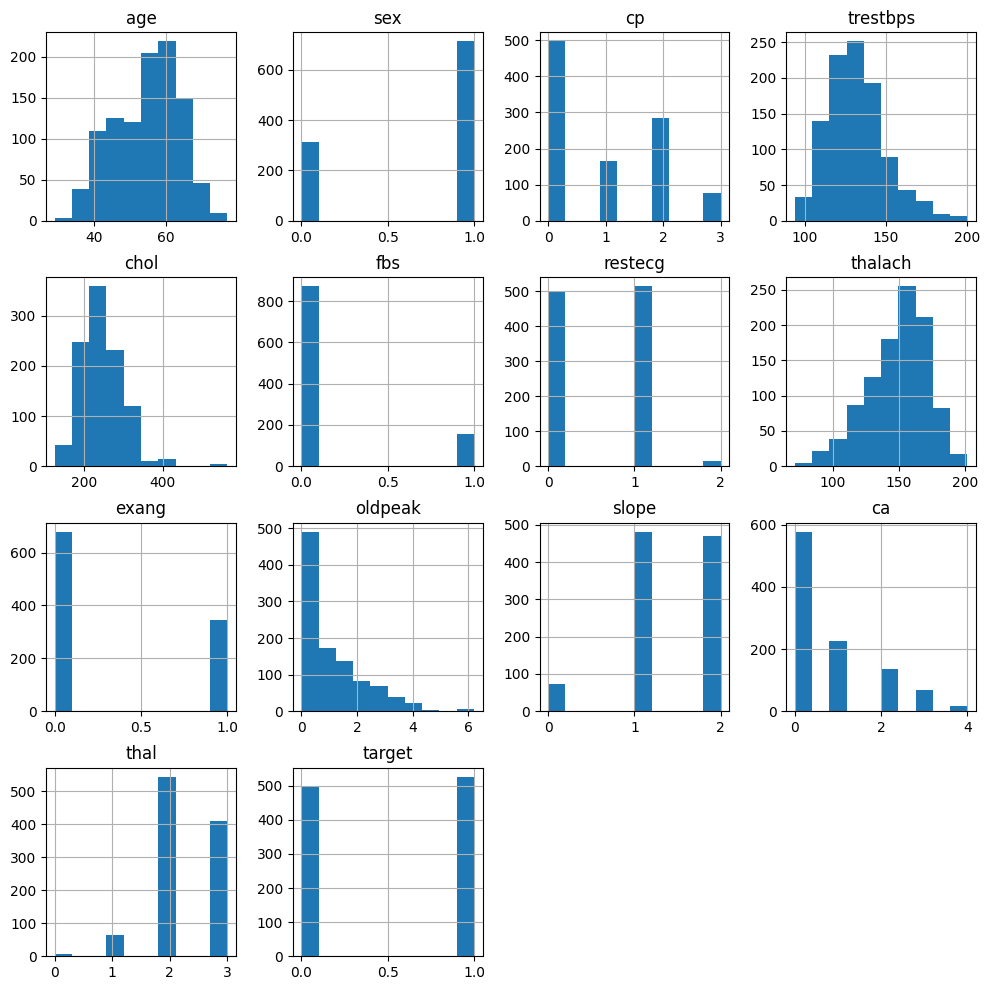

In [16]:
data.hist(figsize=(12,12))
plt.show()

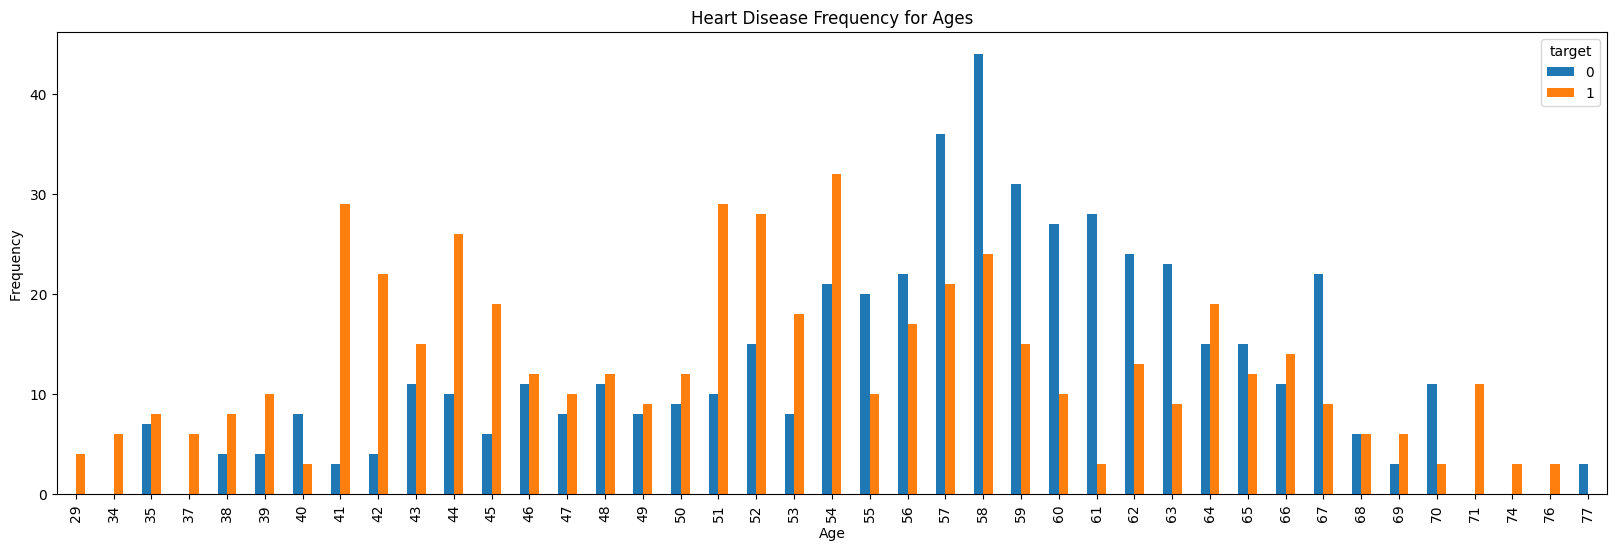

In [23]:
pd.crosstab (data.age,data.target).plot (kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency ')
plt.show()

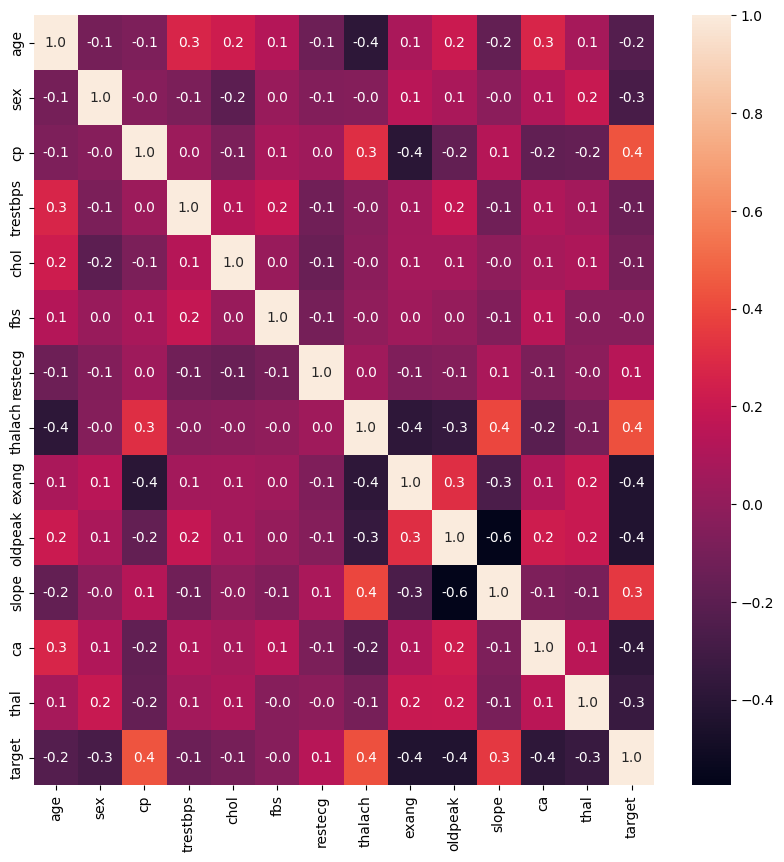

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

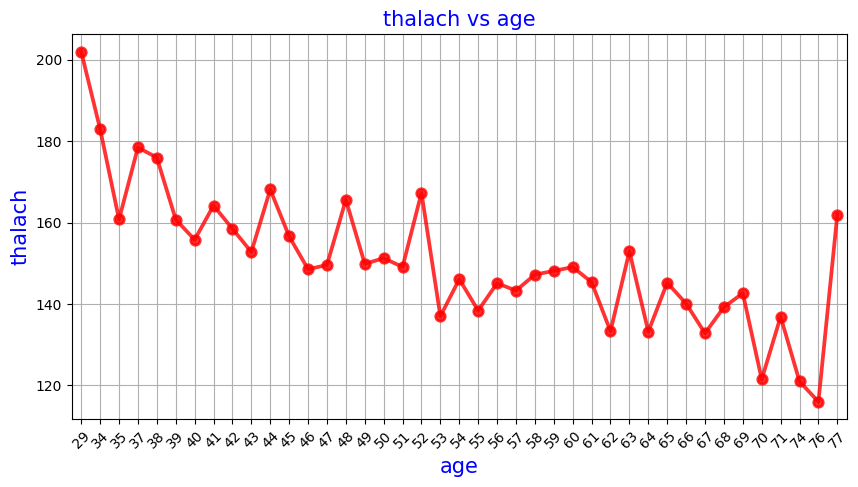

In [40]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
mean_thalach_=[]
for i, age in enumerate(age_unique):
  mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('age',fontsize=15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('thalach',fontsize=15,color='blue')
plt.title('thalach vs age',fontsize=15,color='blue')
plt.grid()
plt.show()





In [43]:
X=np.array(data.drop(['target'], axis=1)) # Specify axis as a keyword argument
Y=np.array(data['target'])

In [44]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [46]:
mean=X.mean(axis=0)
X-=mean
std=X.std(axis=0)
X/=std


In [47]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

In [61]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, stratify=Y, random_state=42, test_size=0.2)
# Changed 'y' to 'Y' in the stratify parameter

In [63]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=None)
Y_test = to_categorical(Y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [64]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001) # Changed 'lr' to 'learning_rate'
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

None


In [69]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5807 - loss: 0.6848 - val_accuracy: 0.8634 - val_loss: 0.6015
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8226 - loss: 0.5652 - val_accuracy: 0.8634 - val_loss: 0.4693
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8497 - loss: 0.4547 - val_accuracy: 0.8390 - val_loss: 0.3985
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8767 - loss: 0.3874 - val_accuracy: 0.8488 - val_loss: 0.3621
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8302 - loss: 0.3835 - val_accuracy: 0.8390 - val_loss: 0.3445
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8659 - loss: 0.3754 - val_accuracy: 0.8488 - val_loss: 0.3355
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8757 - loss: 0.3454 - val_accuracy: 0.8488 - val_loss: 0.3306
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8798 - loss: 0.3502 - val_accuracy: 0.8537 - val_

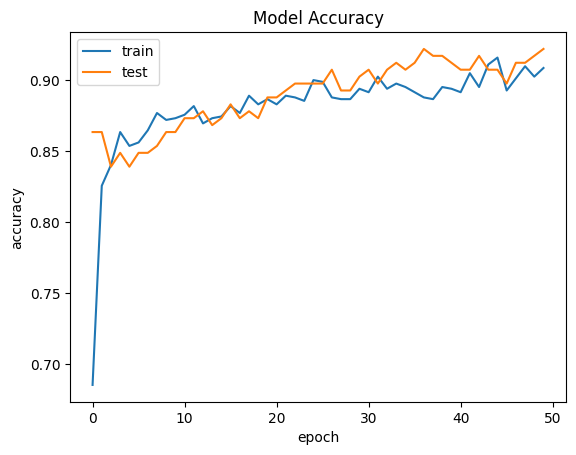

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

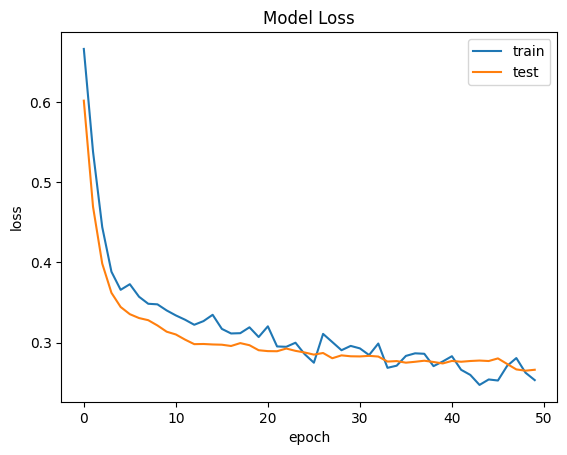

In [72]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [80]:
import pandas as pd

# Replace 'your_data.csv' with your actual file path
data = pd.read_csv('/content/heart.csv')

# Assuming the target variable is in the last column
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target variable

# Split data into training and testing sets
# You may use train_test_split from sklearn.model_selection if you haven't already
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed
# Now you can continue with your existing code:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1]


In [82]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    # Changed 'lr' to 'learning_rate' for Adam optimizer
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) #Use the optimizer instance
    return model

binary_model = create_binary_model()

print(binary_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [83]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4972 - loss: 0.7952 - val_accuracy: 0.6439 - val_loss: 0.6405
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6185 - loss: 0.6430 - val_accuracy: 0.6683 - val_loss: 0.6193
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6156 - loss: 0.6413 - val_accuracy: 0.6537 - val_loss: 0.6160
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6485 - loss: 0.6121 - val_accuracy: 0.6878 - val_loss: 0.5913
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.5986 - val_accuracy: 0.6878 - val_loss: 0.5849
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.5691 - val_accuracy: 0.6439 - val_loss: 0.5834
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.5749 - val_accuracy: 0.6488 - val_loss: 0.5961
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.5519 - val_accuracy: 0.7171 - val_loss:

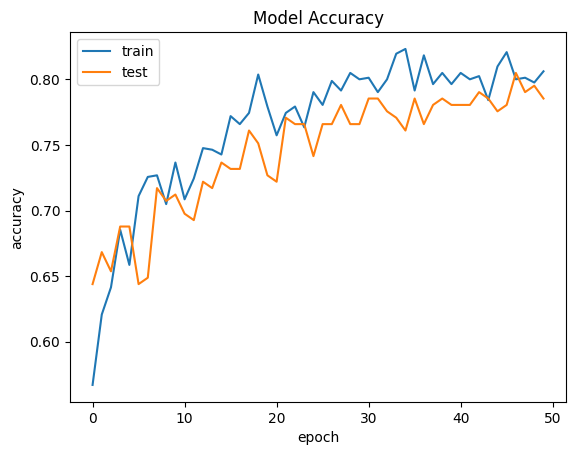

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy']) # Changed 'acc' to 'accuracy'
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

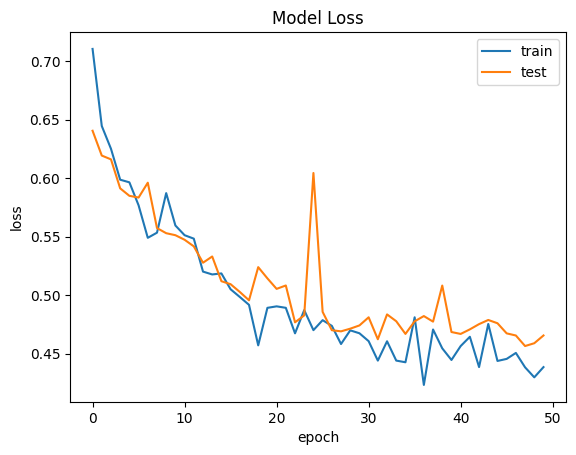

In [86]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [87]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Results for Categorical Model
0.5121951219512195
              precision    recall  f1-score   support

           0       0.51      0.75      0.60       102
           1       0.53      0.28      0.37       103

    accuracy                           0.51       205
   macro avg       0.52      0.51      0.49       205
weighted avg       0.52      0.51      0.48       205



In [88]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Results for Binary Model
0.7853658536585366
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       102
           1       0.73      0.92      0.81       103

    accuracy                           0.79       205
   macro avg       0.81      0.78      0.78       205
weighted avg       0.81      0.79      0.78       205

